Q4: The binary categorical response variable to model for random forest that we have chosen is DEATH_EVENT. We use age, ejection_fraction, serum_creatinine, and high_blood_pressure as predictors (these features were found to be the best predictors under EDA).

after training, we found the ROC curve for each obs of the validation set. our AUC of 0.8034 demonstrates our model performing well when distinguisihing between those who lived and those who died.

We also tested. using 5-fold cross validation to show how stable our model is. we see great predictive power: Mean Accuracy: 0.6833
Mean AUC: 0.7027

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score


from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/M148TeamProject/heart_failure_clinical_records_dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Q1: For the data set you have chosen and the binary categorical response variable that you had chosen
for Check-In 3 for a logistic regression or another binary variable in your data set, apply the KNN
algorithm or Random Forest Algorithm for classification.(The variable chosen does not have to be
directly related to the final goal of your project.)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

y = df['DEATH_EVENT']
x = df[['age', 'ejection_fraction', "serum_creatinine", 'high_blood_pressure']]

x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.2, random_state=42)

# random forest seems easier ol
rf = RandomForestClassifier(n_estimators=100, random_state=42) # have we been using random state
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Q2: Calculate the confusion matrix, prediction accuracy, prediction error, true positive rate, and true
negative rate, and F1 score on your training data set.

In [ ]:
# from check-in 3
y_pred_train = rf.predict(x_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)
TN, FP, FN, TP = train_conf_matrix.ravel()

# Training confusion matrix - we see model is overfitting on training data
prediction_accuracy = accuracy_score(y_train, y_pred_train)
prediction_error = 1 - prediction_accuracy
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
f1 = f1_score(y_train, y_pred_train) # and f1 score


print("\nConfusion Matrix (Training Data):")
print(train_conf_matrix)
print(f"\nPrediction Accuracy: {prediction_accuracy:.4f}")
print(f"Prediction Error: {prediction_error:.4f}")
print(f"True Positive Rate: {TPR:.4f}")
print(f"True Negative Rate: {TNR:.4f}")
print(f"F1 Score: {f1:.4f}")


# Test confusion matrix - confusion matrix is more like what expect to see
y_pred_test = rf.predict(x_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
test_TN, test_FP, test_FN, test_TP = test_conf_matrix.ravel()

test_prediction_accuracy = accuracy_score(y_test, y_pred_test)
test_prediction_error = 1 - prediction_accuracy
test_TPR = test_TP / (test_TP + test_FN)
test_TNR = test_TN / (test_TN + test_FP)
test_f1 = f1_score(y_test, y_pred_test) # and f1 score


print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)
print(f"\nPrediction Accuracy: {test_prediction_accuracy:.4f}")
print(f"Prediction Error: {test_prediction_error:.4f}")
print(f"True Positive Rate: {test_TPR:.4f}")
print(f"True Negative Rate: {test_TNR:.4f}")
print(f"F1 Score: {test_f1:.4f}")





Confusion Matrix (Training Data):
[[168   0]
 [  0  71]]

Prediction Accuracy: 1.0000
Prediction Error: 0.0000
True Positive Rate: 1.0000
True Negative Rate: 1.0000
F1 Score: 1.0000

Confusion Matrix (Test Data):
[[27  8]
 [12 13]]

Prediction Accuracy: 0.6667
Prediction Error: 0.0000
True Positive Rate: 0.5200
True Negative Rate: 0.7714
F1 Score: 0.5652


Q3:
Calculate and plot the ROC curve and AUC on your validation data set. Use 5-fold cross-validation
on the validation set to calculate the AUC and accuracy of each fold.

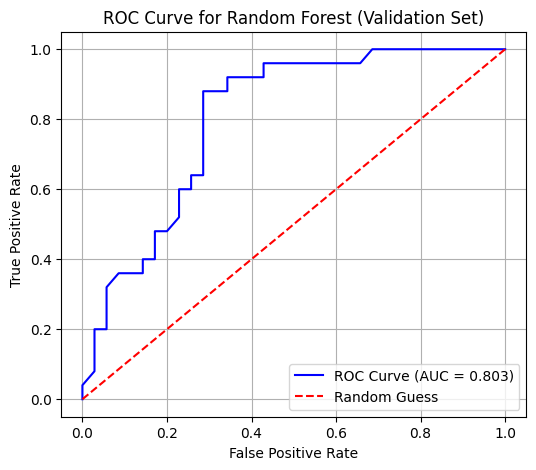

AUC on Validation Set: 0.8034

Mean Accuracy: 0.6833
Mean AUC: 0.7027

5-Fold Cross-Validation Results on Validation Set:
Fold 1: Accuracy = 0.8333, AUC = 0.8286
Fold 2: Accuracy = 0.7500, AUC = 0.8714
Fold 3: Accuracy = 0.6667, AUC = 0.7344
Fold 4: Accuracy = 0.5000, AUC = 0.6571
Fold 5: Accuracy = 0.6667, AUC = 0.4219


In [ ]:
# copied from check in 3

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# we are trying to predict probabilities for the positive class, i.e. when DEATH_EVENT = 1
y_val_prob = model.predict_proba(x_val)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
auc_score = roc_auc_score(y_val, y_val_prob)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve for Random Forest (Validation Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC on Validation Set: {auc_score:.4f}")

# Perform 5-Fold Cross-Validation on the validation set
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(model, x_val, y_val, cv=kf, scoring='accuracy')
auc_scores = cross_val_score(model, x_val, y_val, cv=kf, scoring='roc_auc')

print(f"\nMean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean AUC: {np.mean(auc_scores):.4f}")

print("\n5-Fold Cross-Validation Results on Validation Set:")
for i in range(5):
    print(f"Fold {i+1}: Accuracy = {accuracy_scores[i]:.4f}, AUC = {auc_scores[i]:.4f}")